# Speaker Accent Recognition Data Set (2020)

# a)Data Set Description

Data set name is “Speaker Accent Recognition Data Set (2020)”. This dataset features single English words read by speakers from six different countries ({ES, FR, GE, IT, UK, US} for accent detection and recognition. 

There are 12 attributes X1, X2, ..., X12 obtained using MFCC (Mel frequency Cepstral Coefficient). MFCC extract audio signal and store into 39 features. But in this dataset to recognize the speaker accent, we use only 12 features. This dataset consists of one output variable stored in column “Language”. It has 6 different languages. With these inputs, we predict the accent of the speaker by this MFCC coefficients.

The goal is to perform classification based on two classes “accent is US” or “accent is NOT US”. 
There are total 329 data points. Each datapoint has all the values for MFCC float coefficients ranging from negative real number to positive real number. The input data type is numerical data or precisely floats. There are no null values or missing values.

Import required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import joblib
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
random_state=42
import math

SAR_df = pd.read_csv("accent-mfcc-data-1.csv")

In [4]:
SAR_df.head()  #Displaying 5 data points from the beginning

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [5]:
SAR_df.tail()  #Displaying 5 data points from the end

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275
328,US,3.214254,-3.135152,1.122691,4.712444,5.926518,6.915566,-5.799727,10.858532,-11.659845,10.605734,0.349482,-5.983281


In [6]:
SAR_df.describe()  #Displaying summary statistics of the dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


From the above statistics we can see that the ocunt is same for all the MFCC coefficients (X1-X12). From this, we can refer that there no NaN in th eimported datatset,

In [7]:
SAR_df.info()  #Displaying information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


# b) Data Set Visualization

In [8]:
SAR_df_X = SAR_df.drop(['language'], axis=1)  
#dropped 'language' column from the dataset. Dataset contains only inputs(Xs) coefficeients values.


### Box Plot

<AxesSubplot:>

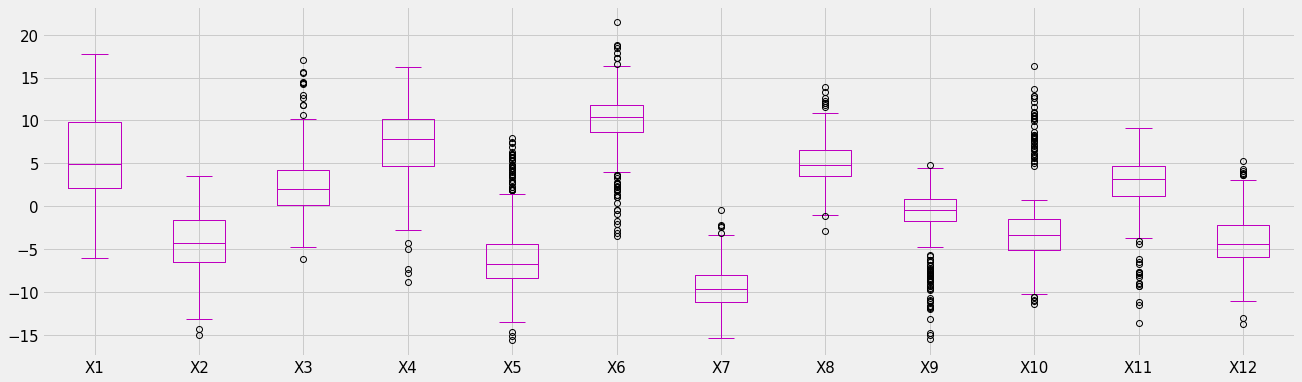

In [9]:
SAR_df_X.boxplot(column=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'], 
                 figsize = (20, 6), fontsize=15, color='m') 

Comment: 
This is a box plot where we plot the min, max, Q1, median and Q3. This gives an idea of the spread of the data.
All the features are varying between a finite range from -15 to 20. We can see few coefficients have small spread while few has large spread. We also observe some outliners in the box plots colored in black.

### Scatter Plot

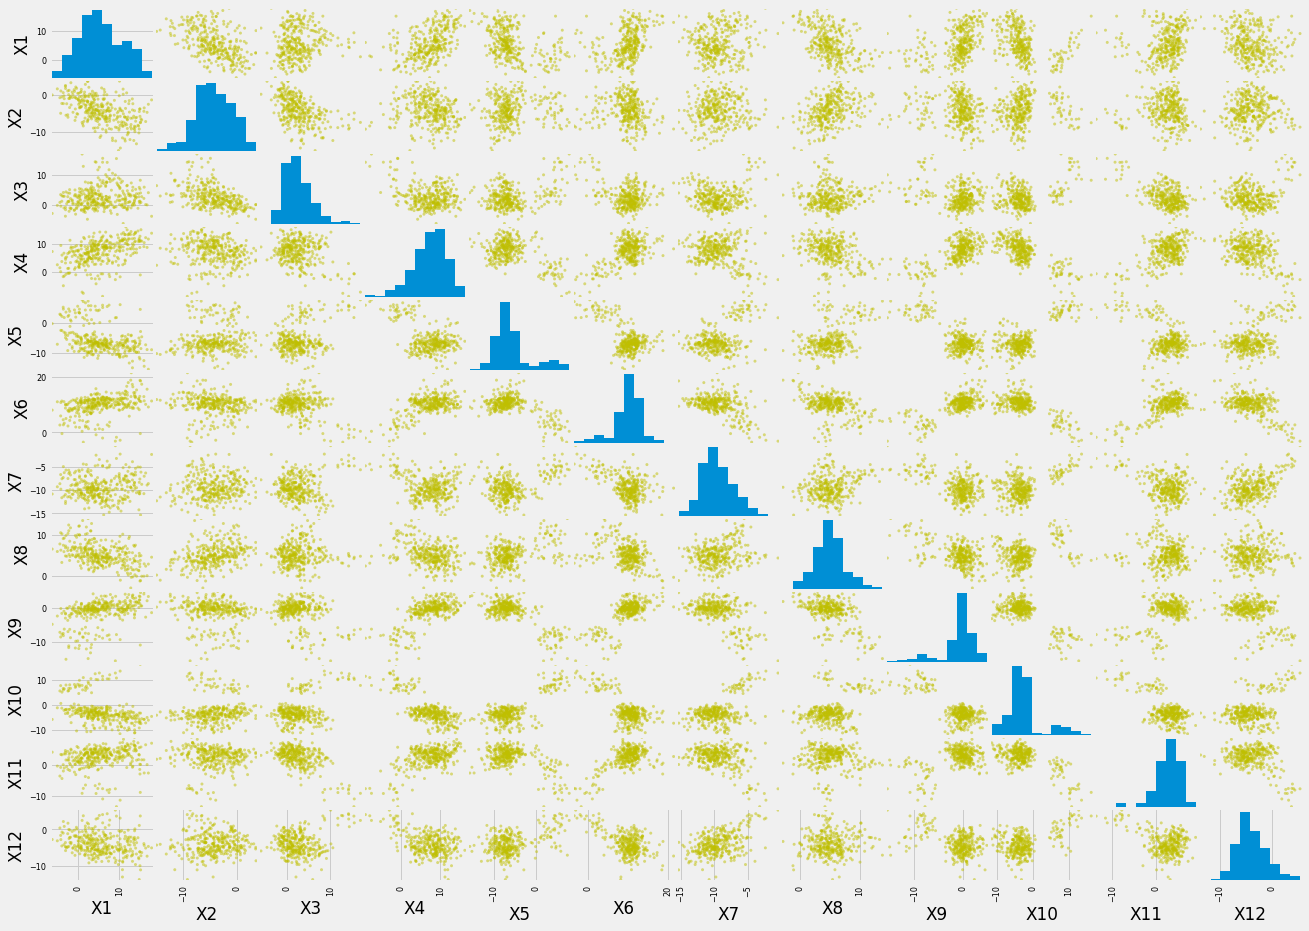

In [10]:
scatter_matrix (SAR_df_X, figsize=(20, 15), color='y');

Comment: 
In this scatter plot, the correlation among the two features are shown. Like X1 is negatively correlated with X2. And X4 is positively correlated with X1. Whereas X11 and X2 has almost zero correlation. We don't see any nonlinear relation where the correlation would be zero.

### Histogram Plot

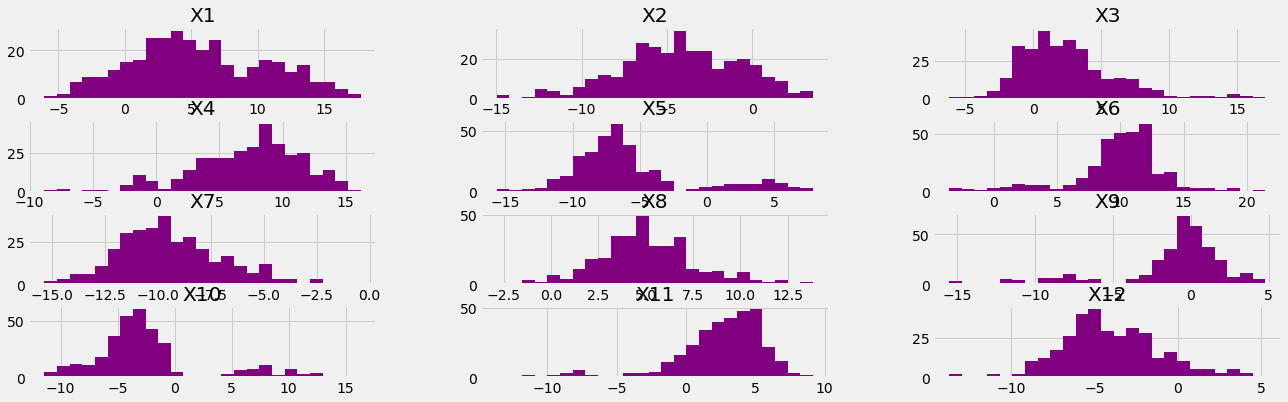

In [11]:
SAR_df_X.hist(bins = 25, figsize = (20, 6), color='purple')
plt.show()

Comment:
From the above histograms, we can see the number of data points for s specific range for a feature. This also clearly shows the outliners. Like for X8, few observations are in the range 0 to 5 which is away from rest of the observations. Also, we can observe that X1 has two peaks while X9 is unimodal. X11 is left skewed and X6is right skewed.

### Correlation Matrix

In [12]:
corr_matrix = SAR_df_X.corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
X1,1.000000,-0.516210,0.111992,0.468499,-0.418736,0.368058,0.081495,-0.468839,0.392974,-0.358173,0.164058,-0.237836
X2,-0.516210,1.000000,-0.475168,-0.133245,0.091181,-0.110199,0.052197,0.354930,-0.105822,0.081283,-0.006415,0.021244
X3,0.111992,-0.475168,1.000000,-0.304516,0.325788,-0.321455,0.133902,0.037379,-0.304485,0.370584,-0.597373,0.174310
X4,0.468499,-0.133245,-0.304516,1.000000,-0.518275,0.587991,-0.276286,-0.317395,0.672918,-0.739205,0.560560,-0.435478
X5,-0.418736,0.091181,0.325788,-0.518275,1.000000,-0.602486,0.411764,0.442394,-0.765331,0.738060,-0.526548,0.443376
X6,0.368058,-0.110199,-0.321455,0.587991,-0.602486,1.000000,-0.505647,-0.395979,0.714804,-0.710877,0.630567,-0.535893
X7,0.081495,0.052197,0.133902,-0.276286,0.411764,-0.505647,1.000000,0.216448,-0.527454,0.532713,-0.408103,0.449124
X8,-0.468839,0.354930,0.037379,-0.317395,0.442394,-0.395979,0.216448,1.000000,-0.522148,0.297147,-0.033765,0.059785
X9,0.392974,-0.105822,-0.304485,0.672918,-0.765331,0.714804,-0.527454,-0.522148,1.000000,-0.759978,0.497700,-0.407227
X10,-0.358173,0.081283,0.370584,-0.739205,0.738060,-0.710877,0.532713,0.297147,-0.759978,1.000000,-0.673149,0.444235


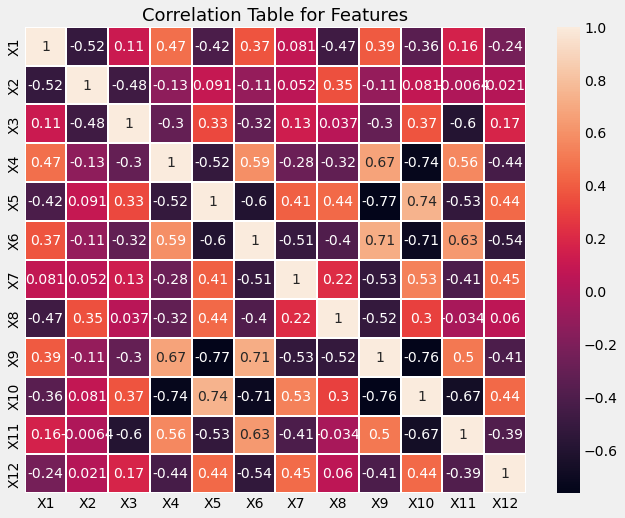

In [13]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(SAR_df_X.corr(), annot=True, linewidths=.1)

Comment:
This is a correlation matrix which gives the correlation between the two features. All the the obeservation we said in scatter plots shows here as well. Like X1 is negatively correlated with X2. And X4 is positively correlated with X1. Whereas X11 and X2 has zero correlation.

In [14]:
SAR_df_isUS=SAR_df
SAR_df_isUS['isUS'] = [True if l == 'US' else False for l in SAR_df_isUS['language']]
SAR_df_isUS.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,isUS
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274,False
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857,False
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144,False
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441,False
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310,False


<AxesSubplot:xlabel='isUS', ylabel='count'>

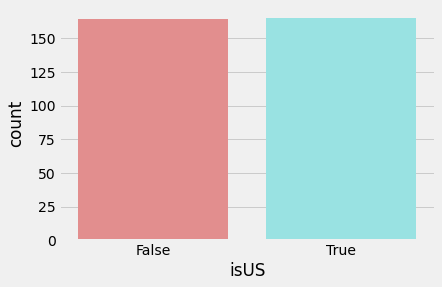

In [15]:
sns.countplot(x='isUS', data=SAR_df_isUS, palette=['#F08080',"#8DEEEE"])

Comment:
Out dataset is biased meaning we have equal number of both the labels. 

# c) Data Set Cleaning

### 1. Check for Duplicates


In [16]:
print('No of duplicates in train: {}'.format(sum(SAR_df_X.duplicated())))

No of duplicates in train: 0


### 2. Checking for NaN/null values

In [17]:
print('We have {} NaN/Null values in train'.format(SAR_df_X.isnull().values.sum()))

We have 0 NaN/Null values in train


### 3.Checking for outliners

In [18]:
Q1 = SAR_df_X.quantile(0.25)
Q3 = SAR_df_X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1     7.728045
X2     4.955514
X3     4.040984
X4     5.428291
X5     3.954376
X6     3.140798
X7     3.131490
X8     3.106763
X9     2.529075
X10    3.577485
X11    3.475663
X12    3.749751
dtype: float64


In [19]:
outliner_present=(SAR_df_X < (Q1 - 3 * IQR)) |(SAR_df_X > (Q3 + 3 * IQR))
outliner_present

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
324,False,False,False,False,False,False,False,False,True,False,False,False
325,False,False,False,False,False,False,False,False,True,False,False,False
326,False,False,False,False,False,False,False,False,True,False,False,False
327,False,False,False,False,False,False,False,False,True,False,False,False


In [20]:
SAR_df_X_cln = SAR_df_X[~((SAR_df_X < (Q1 - 3 * IQR)) |(SAR_df_X > (Q3 + 3 * IQR))).any(axis=1)]
#removes outliers based on the IQR range
SAR_df_X_cln.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.804457,-4.205163,2.076346,7.977350,-6.623632,10.454695,-9.830645,4.905541,-0.369013,-3.507673,3.087382,-4.359949
std,5.148248,3.534383,2.901799,3.527111,3.491719,2.743840,2.121031,2.402486,2.334398,3.453147,2.454082,2.604916
min,-6.067831,-14.972962,-6.186583,-5.013315,-15.656596,-0.448422,-15.365665,-2.873862,-8.730315,-11.429178,-6.542835,-13.724103
25%,2.321762,-6.323271,0.020040,5.727589,-8.621820,9.127395,-11.281021,3.420411,-1.199437,-5.270975,1.663679,-6.009398
50%,5.178245,-4.220978,1.844066,8.326915,-6.953871,10.581774,-9.915901,4.823223,-0.189056,-3.529834,3.440595,-4.576490
75%,9.988759,-1.559716,3.770190,10.465668,-5.590809,11.848389,-8.428646,6.477344,0.902580,-2.090948,4.860291,-2.509919
max,17.749851,3.570765,10.620756,16.178942,6.901835,18.777547,-2.321599,13.360629,4.789989,8.658534,9.166066,2.146878


In [21]:
SAR_df_X_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 320
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      299 non-null    float64
 1   X2      299 non-null    float64
 2   X3      299 non-null    float64
 3   X4      299 non-null    float64
 4   X5      299 non-null    float64
 5   X6      299 non-null    float64
 6   X7      299 non-null    float64
 7   X8      299 non-null    float64
 8   X9      299 non-null    float64
 9   X10     299 non-null    float64
 10  X11     299 non-null    float64
 11  X12     299 non-null    float64
dtypes: float64(12)
memory usage: 30.4 KB


In [22]:
SAR_df_X_cln1 = SAR_df_isUS[~((SAR_df_isUS < (Q1 - 3 * IQR)) |(SAR_df_isUS > (Q3 + 3 * IQR))).any(axis=1)]
#removes outliers based on the IQR range
SAR_df_X_cln1.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.804457,-4.205163,2.076346,7.977350,-6.623632,10.454695,-9.830645,4.905541,-0.369013,-3.507673,3.087382,-4.359949
std,5.148248,3.534383,2.901799,3.527111,3.491719,2.743840,2.121031,2.402486,2.334398,3.453147,2.454082,2.604916
min,-6.067831,-14.972962,-6.186583,-5.013315,-15.656596,-0.448422,-15.365665,-2.873862,-8.730315,-11.429178,-6.542835,-13.724103
25%,2.321762,-6.323271,0.020040,5.727589,-8.621820,9.127395,-11.281021,3.420411,-1.199437,-5.270975,1.663679,-6.009398
50%,5.178245,-4.220978,1.844066,8.326915,-6.953871,10.581774,-9.915901,4.823223,-0.189056,-3.529834,3.440595,-4.576490
75%,9.988759,-1.559716,3.770190,10.465668,-5.590809,11.848389,-8.428646,6.477344,0.902580,-2.090948,4.860291,-2.509919
max,17.749851,3.570765,10.620756,16.178942,6.901835,18.777547,-2.321599,13.360629,4.789989,8.658534,9.166066,2.146878


In [23]:
SAR_df_X_cln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 320
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  299 non-null    object 
 1   X1        299 non-null    float64
 2   X2        299 non-null    float64
 3   X3        299 non-null    float64
 4   X4        299 non-null    float64
 5   X5        299 non-null    float64
 6   X6        299 non-null    float64
 7   X7        299 non-null    float64
 8   X8        299 non-null    float64
 9   X9        299 non-null    float64
 10  X10       299 non-null    float64
 11  X11       299 non-null    float64
 12  X12       299 non-null    float64
 13  isUS      299 non-null    bool   
dtypes: bool(1), float64(12), object(1)
memory usage: 33.0+ KB


In [24]:
X_cln= SAR_df_X_cln1.drop(['language', 'isUS'], axis=1)
y_cln= SAR_df_X_cln1["isUS"]
print(X_cln.shape)
print(y_cln.shape)

(299, 12)
(299,)


# e) Feature Extraction

This speaker accent recognition dataset is consisting of MFCC coefficients extracted from audio files of human speaking. Overall, MFCC technique generated 39 features from each audio samples which are used as input for speech recognition model. First 12 coefficients of the signal are extracted out of 39 coefficients. 
This is nothing but a feature extraction. Since we already have a extracted dataset, further extraction would result into the loss of information.  


### Baseline Models Development

#### Splitting the date into training and test

In [25]:
X = SAR_df_X               #SAR_df_X is the extracted input (X1 to X12)
y  = SAR_df_isUS['isUS']   #y is the extracted output (isUS)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

#### 1)Logistic Regression

In [26]:
logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr = logis_regr.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_lr))
y_pred_lr = logis_regr.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_lr))

Accuracy for training set is:  0.7804054054054054
Accuracy for testing set is:  0.8484848484848485


#### 2)KNN

In [27]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train);
y_pred_knn = knn_clf.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_knn))
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_knn))

Accuracy for training set is:  0.9324324324324325
Accuracy for testing set is:  0.8787878787878788


#### 3)Decision Tree

In [28]:
Decision_clf=DecisionTreeClassifier(random_state=42)
Decision_clf.fit(X_train, y_train);
y_pred_dt = Decision_clf.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_dt))
y_pred_dt = Decision_clf.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_dt))

Accuracy for training set is:  1.0
Accuracy for testing set is:  0.8484848484848485


#### 4)Random Forest

In [29]:
RanForest_clf=RandomForestClassifier(random_state=42)
RanForest_clf.fit(X_train, y_train);
y_pred_rf = RanForest_clf.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_rf))
y_pred_rf = RanForest_clf.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_rf))

Accuracy for training set is:  1.0
Accuracy for testing set is:  0.9393939393939394


### Comment:
From the baseline model we observed that the accuracy of models on the training dataset is low for KNN and logistic Regression.  
And in case of the decision tree and random forest, the models fits well for training data and shows error on test data. In this case the model is overfitted for training data. 
Hence to increase the performance of the model in term of training an testing accuracy tunning is required.

# Tunning

### 1)Logistic Regression Regularization

### Lasso Regularization

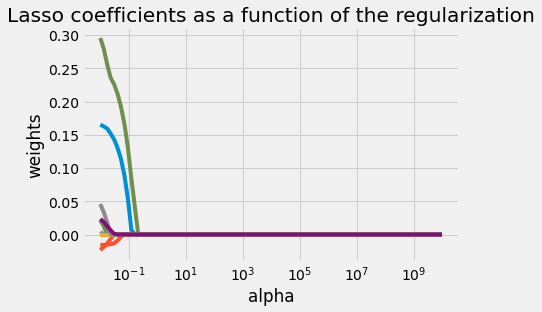

In [30]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas*2:
 lasso.set_params(alpha=a)
 lasso.fit(scale(X_train), y_train)
 coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::1]) # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [31]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())
print(" alpha=" ,lassocv.alpha_)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
pd.Series(lasso.coef_, index=X.columns)

 alpha= 0.008275571475356538


X1     0.166968
X2    -0.015643
X3    -0.000000
X4     0.026706
X5     0.006524
X6    -0.000000
X7     0.000000
X8    -0.026108
X9     0.000000
X10    0.304035
X11    0.052437
X12    0.025455
dtype: float64

X3, X7 have lowest alpha and can be eliminated

In [32]:
X_tunned_lasso= X.drop(['X3','X7'], axis=1)   
X_train, X_test, y_train, y_test = train_test_split(X_tunned_lasso, y, test_size=0.1,random_state=42)

logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr_lasso = logis_regr.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_lr_lasso))
y_pred_lr_lasso = logis_regr.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_lr_lasso))

Accuracy for training set is:  0.777027027027027
Accuracy for testing set is:  0.8484848484848485


### Ridge Regularization

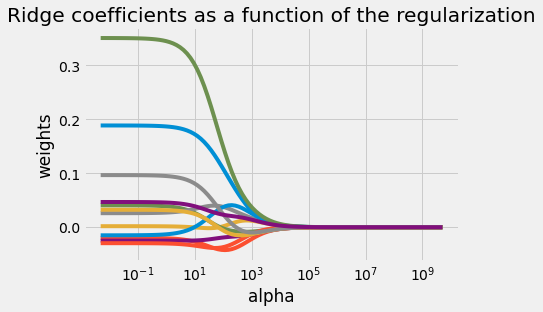

In [33]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []
for a in alphas:
 ridge.set_params(alpha=a)
 ridge.fit(scale(X), y)
 coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs ) 
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [34]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'r2',normalize = True)
ridgecv.fit(X_train, y_train)
print("Optimized alpha is",ridgecv.alpha_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)

ridge4.fit(X_train, y_train) # Fit a ridge regression on the training data
pred4 = ridge4.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index = X.columns)) # Print coefficients

Optimized alpha is 0.026683496156031508
X1     0.031973
X2    -0.005095
X3     0.001555
X4     0.006502
X5     0.008563
X6    -0.006039
X7     0.004664
X8    -0.016243
X9     0.008141
X10    0.059870
X11    0.023517
X12    0.008407
dtype: float64


In [35]:
X_tunned_ridge= X.drop(['X2','X1','X5'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_tunned_ridge, y, test_size=0.1,random_state=42)

logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr_ridge = logis_regr.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_lr_ridge))
y_pred_lr_ridge = logis_regr.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_lr_ridge))


Accuracy score for training set is:  0.7331081081081081
Accuracy score for test set is:  0.696969696969697


### Using K-Fold

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
param_grid_lr = {
    'max_iter': [ 20, 50, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid=GridSearchCV(estimator=LogisticRegression(random_state=42),param_grid=param_grid_lr,verbose=1,cv=10)
logModel_grid.fit(X_train, y_train);
print("Estimator", logModel_grid.best_estimator_);
print("")
y_pred_kfold = logModel_grid.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_kfold))
y_pred_kfold = logModel_grid.predict(X_test)
print("Accuracy score for testing set is: ", accuracy_score(y_test, y_pred_kfold))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Estimator LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='saga')

Accuracy score for training set is:  0.777027027027027
Accuracy score for testing set is:  0.7575757575757576


#### Comment
Since the Logistic Regression is not overfitting, L1 and L2 regularization is not helping in increasing the accuracy of the Logistic Regression model.

As inferred, logistic regression is underfitting, we can try increasing the model complexity by adding  non linearity.

#### Non-linear model

In [37]:
X_complex=X
X_complex['X10_Sq']=X_complex['X10']**3
X_complex['X1_Sq']=X_complex['X1']**2
# non-linear predictor (sqrt of 'anchor ratio') in dataset
X_complex[['X10_Sq','X1_Sq']]

,X10_Sq,X1_Sq
0,-22.253312,50.005768
1,-91.661317,120.625568
2,-373.876746,61.263625
3,-218.084264,45.482651
4,-48.420064,34.068730
...,...,...
324,362.453267,0.275911
325,304.600214,4.384841
326,433.135199,4.481304
327,101.481983,0.089770


In [38]:
X_complex.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X10_Sq,X1_Sq
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274,-22.253312,50.005768
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857,-91.661317,120.625568
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144,-373.876746,61.263625


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_complex, y, test_size=0.1,random_state=42)
logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_comp = logis_regr.predict(X_train)
print("Accuracy for training set is: ", accuracy_score(y_train, y_pred_comp))
y_pred_comp = logis_regr.predict(X_test)
print("Accuracy for testing set is: ", accuracy_score(y_test, y_pred_comp))

Accuracy for training set is:  0.7905405405405406
Accuracy for testing set is:  0.7878787878787878


### Comment:
L1 and L2 penalties on logistic regression is not significantly increasing the accuracy of the logistic regression model

### KNN Tunning

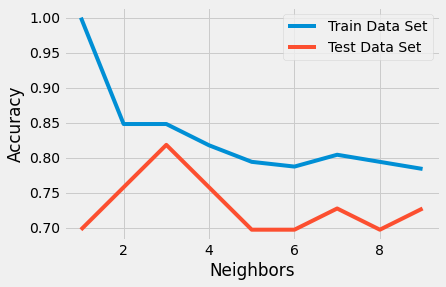

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
n_neighbors = range(1, 10)
train_data_accuracy = []
test_data_accuracy = []

for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test_data_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3, leaf_size=30)

knn_clf.fit(X_train, y_train);
y_pred_knn = knn_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_knn))
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_knn))

Accuracy score for training set is:  0.847972972972973
Accuracy score for test set is:  0.8181818181818182


### Decision Tree Tunning

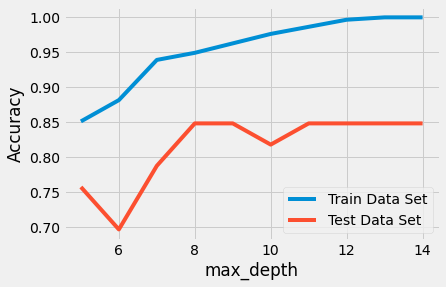

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
max_depth = range(5, 15)
train_data_accuracy = []
test_data_accuracy = []

for n_depth in max_depth:
    df = DecisionTreeClassifier(max_depth=n_depth,random_state=2)
    df.fit(X_train, y_train)
    train_data_accuracy.append(df.score(X_train, y_train))
    test_data_accuracy.append(df.score(X_test, y_test))
    
plt.plot(max_depth, train_data_accuracy, label="Train Data Set")
plt.plot(max_depth, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.show()

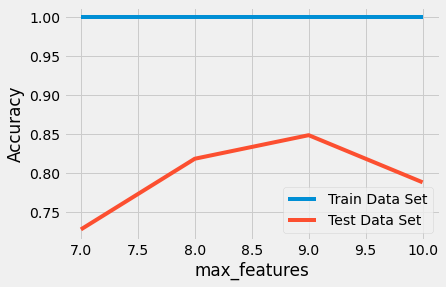

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
max_features = range(7, 11)
train_data_accuracy = []
test_data_accuracy = []

for n_features in max_features:
    df = DecisionTreeClassifier(max_features=n_features,random_state=14)
    df.fit(X_train, y_train)
    train_data_accuracy.append(df.score(X_train, y_train))
    test_data_accuracy.append(df.score(X_test, y_test))
    
plt.plot(max_features, train_data_accuracy, label="Train Data Set")
plt.plot(max_features, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("max_features")
plt.legend()
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

Decision_clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.001,random_state=42)
Decision_clf.fit(X_train, y_train);
y_pred_dt = Decision_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_dt))
y_pred_dt = Decision_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_dt))

Accuracy score for training set is:  0.9763513513513513
Accuracy score for test set is:  0.8484848484848485


### Random Forest Tunnning

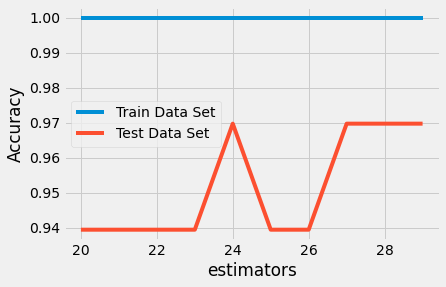

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
n_estimators = range(20, 30)
train_data_accuracy = []
test_data_accuracy = []

for n_esti in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_esti,n_jobs=5,random_state=25)
    rf.fit(X_train, y_train)
    train_data_accuracy.append(rf.score(X_train, y_train))
    test_data_accuracy.append(rf.score(X_test, y_test))
    
plt.plot(n_estimators, train_data_accuracy, label="Train Data Set")
plt.plot(n_estimators, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("estimators")
plt.legend()
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

RanForest_clf=RandomForestClassifier(n_estimators=24,random_state=42,max_depth=19,max_features=7)
RanForest_clf.fit(X_train, y_train);
y_pred_rf = RanForest_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_rf))
y_pred_rf = RanForest_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_rf))

Accuracy score for training set is:  0.9966216216216216
Accuracy score for test set is:  0.9393939393939394


# Fine tune the model on the cleaned dataset which has no outliners.

In [47]:
X_cln= SAR_df_X_cln1.drop(['language', 'isUS'], axis=1)
y_cln= SAR_df_X_cln1["isUS"]
print(X_cln.shape)
print(y_cln.shape)

(299, 12)
(299,)


### Lasso Regularization

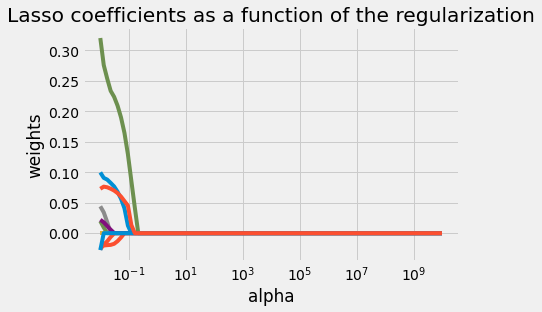

In [48]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas*2:
 lasso.set_params(alpha=a)
 lasso.fit(scale(X_train), y_train)
 coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::1]) # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [49]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())
lassocv.alpha_
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
pd.Series(lasso.coef_, index=X.columns)

X1        0.118407
X2       -0.010661
X3        0.016847
X4        0.036030
X5        0.008593
X6       -0.016961
X7       -0.003774
X8       -0.047567
X9        0.030956
X10       0.450137
X11       0.083036
X12       0.029967
X10_Sq   -0.113136
X1_Sq     0.074442
dtype: float64

In [50]:
X_tunned_cln_lasso= X_cln.drop(['X5','X7'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_tunned_cln_lasso, y_cln, test_size=0.1,random_state=42)

logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr_cln_lasso = logis_regr.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_lr_cln_lasso))
y_pred_lr_cln_lasso = logis_regr.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_lr_cln_lasso))

Accuracy score for training set is:  0.758364312267658
Accuracy score for test set is:  0.7333333333333333


### Ridge Regularization

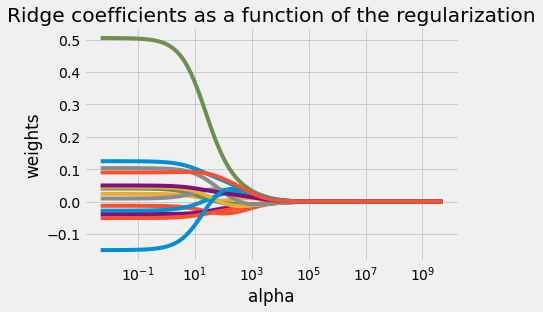

In [51]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []
for a in alphas:
 ridge.set_params(alpha=a)
 ridge.fit(scale(X), y)
 coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs ) 
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [52]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'r2',normalize = True)
ridgecv.fit(X_train, y_train)
print("Lamda is",ridgecv.alpha_)

Lamda is 0.03527401155359316


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)

ridge4.fit(X_train, y_train) # Fit a ridge regression on the training data
pred4 = ridge4.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index = X_cln.columns)) # Print coefficients

X1     0.044052
X2     0.002384
X3     0.018957
X4     0.002715
X5     0.014236
X6    -0.024763
X7     0.004726
X8    -0.034902
X9     0.018580
X10    0.071574
X11    0.020491
X12    0.023182
dtype: float64


In [54]:
X_tunned_cln_ridge= X_cln.drop(['X2','X1','X5'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_tunned_cln_ridge, y_cln, test_size=0.1,random_state=42)

logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr_cln_ridge = logis_regr.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_lr_cln_ridge))
y_pred_lr_cln_ridge = logis_regr.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_lr_cln_ridge))

Accuracy score for training set is:  0.7323420074349443
Accuracy score for test set is:  0.6333333333333333


### Using K-Fold

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
param_grid_lr = {
    'max_iter': [ 20, 50, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, verbose=1, cv=10)
logModel_grid.fit(X_train, y_train);
print("Estimator", logModel_grid.best_estimator_);

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Estimator LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='newton-cg')


In [56]:
y_pred_cln_kfold = logModel_grid.predict(X_train)
print(accuracy_score(y_train, y_pred_cln_kfold), ": is the accuracy score train ")
y_pred_cln_kfold = logModel_grid.predict(X_test)
print(accuracy_score(y_test, y_pred_cln_kfold), ": is the accuracy score test")

0.7657992565055762 : is the accuracy score train 
0.7333333333333333 : is the accuracy score test


Complex model

In [57]:
X_cln['X10_Sq']=X_cln['X10']**3
X_cln['X1_Sq']=X_cln['X1']**2
# non-linear predictor (sqrt of 'anchor ratio') in dataset
X_cln[['X10_Sq','X1_Sq']]

,X10_Sq,X1_Sq
0,-22.253312,50.005768
1,-91.661317,120.625568
2,-373.876746,61.263625
3,-218.084264,45.482651
4,-48.420064,34.068730
...,...,...
312,-1.579951,0.317884
313,-60.344465,65.123158
315,228.880256,1.518146
319,477.040986,16.295926


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)

logis_regr = LogisticRegression(random_state=42)
logis_regr.fit(X_train,y_train)
y_pred_lr_complex = logis_regr.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_lr_complex))
y_pred_lr_complex = logis_regr.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_lr_complex))

Accuracy score for training set is:  0.7843866171003717
Accuracy score for test set is:  0.7666666666666667


#### KNN Tunning

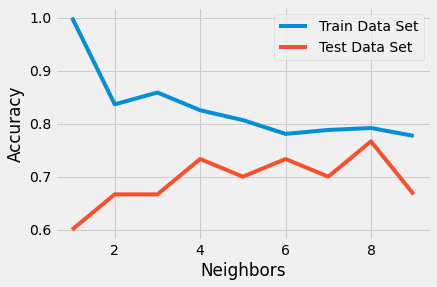

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
n_neighbors = range(1, 10)
train_data_accuracy = []
test_data_accuracy = []

for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test_data_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=8, leaf_size=30)

knn_clf.fit(X_train, y_train);
y_pred_cln_knn = knn_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_cln_knn))
y_pred_cln_knn = knn_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_cln_knn))

Accuracy score for training set is:  0.79182156133829
Accuracy score for test set is:  0.7666666666666667


### Decision Tree

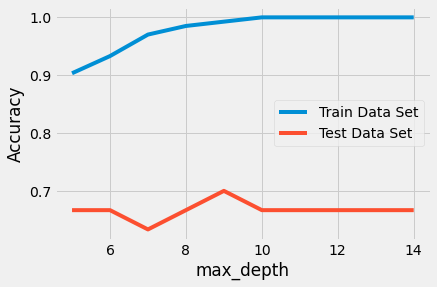

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
max_depth = range(5, 15)
train_data_accuracy = []
test_data_accuracy = []

for n_depth in max_depth:
    df = DecisionTreeClassifier(max_depth=n_depth,random_state=2)
    df.fit(X_train, y_train)
    train_data_accuracy.append(df.score(X_train, y_train))
    test_data_accuracy.append(df.score(X_test, y_test))
    
plt.plot(max_depth, train_data_accuracy, label="Train Data Set")
plt.plot(max_depth, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.show()

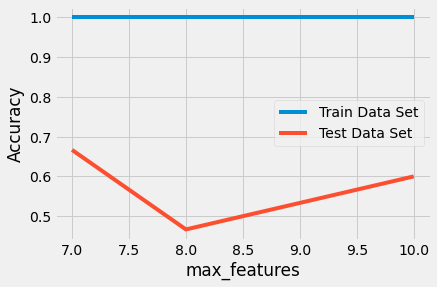

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
max_features = range(7, 11)
train_data_accuracy = []
test_data_accuracy = []

for n_features in max_features:
    df = DecisionTreeClassifier(max_features=n_features,random_state=14)
    df.fit(X_train, y_train)
    train_data_accuracy.append(df.score(X_train, y_train))
    test_data_accuracy.append(df.score(X_test, y_test))
    
plt.plot(max_features, train_data_accuracy, label="Train Data Set")
plt.plot(max_features, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("max_features")
plt.legend()
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)

Decision_clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,random_state=42)
Decision_clf.fit(X_train, y_train);
y_pred_cln_dt = Decision_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_cln_dt))
y_pred_cln_dt = Decision_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_cln_dt))

Accuracy score for training set is:  0.9739776951672863
Accuracy score for test set is:  0.7666666666666667


### Random Forest

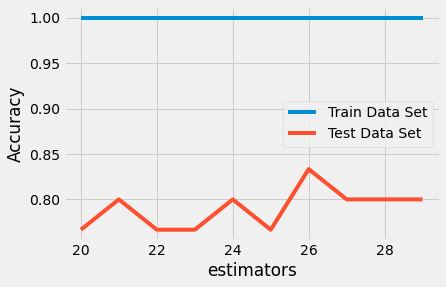

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)
n_estimators = range(20, 30)
train_data_accuracy = []
test_data_accuracy = []

for n_esti in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_esti,n_jobs=5,random_state=25)
    rf.fit(X_train, y_train)
    train_data_accuracy.append(rf.score(X_train, y_train))
    test_data_accuracy.append(rf.score(X_test, y_test))
    
plt.plot(n_estimators, train_data_accuracy, label="Train Data Set")
plt.plot(n_estimators, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("estimators")
plt.legend()
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_cln, y_cln, test_size=0.1,random_state=42)

RanForest_clf=RandomForestClassifier(n_estimators=26,random_state=42,max_depth=19,max_features=7)
RanForest_clf.fit(X_train, y_train);
y_pred_cln_rf = RanForest_clf.predict(X_train)
print("Accuracy score for training set is: ", accuracy_score(y_train, y_pred_cln_rf))
y_pred_cln_rf = RanForest_clf.predict(X_test)
print("Accuracy score for test set is: ", accuracy_score(y_test, y_pred_cln_rf))

Accuracy score for training set is:  1.0
Accuracy score for test set is:  0.7333333333333333


#### Comment:
We compared the accuracies for Logistis Regression, KNN, Decision Tree and Random Forest tunning of cleaned  dataset with  no outliners and dataset with outliners. Since the number of observations are already less, removing outliners is reducing the accuracy of the tunned models. Therefore we will keep the entire dataset with outliners for our final models

# e) Performance

### Logistic Regression

#### Lasso Performance Matrix:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_tunned_lasso, y, test_size=0.1,random_state=42)
print(classification_report(y_test, y_pred_lr_lasso, target_names=['notUS Accent', 'isUS Accent']))

              precision    recall  f1-score   support

notUS Accent       0.87      0.81      0.84        16
 isUS Accent       0.83      0.88      0.86        17

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



In [67]:
cm=metrics.confusion_matrix(y_test,y_pred_lr_lasso)
cm_df=pd.DataFrame(cm, columns= ['Predicted Negative','Predicted Positive'],
                   index=['Actual Negative','Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,13,3
Actual Positive,2,15


AUC of ROC for Lasso Regression is:  0.8474264705882353


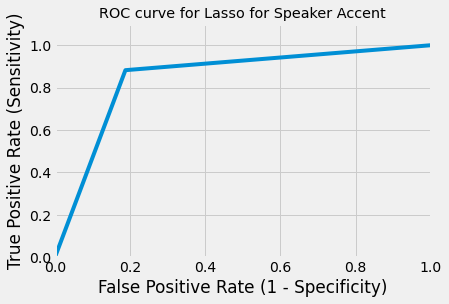

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr_lasso)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for Lasso for Speaker Accent')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print("AUC of ROC for Lasso Regression is: ", metrics.roc_auc_score(y_test,y_pred_lr_lasso))

#### Ridge Performance Matrix:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_tunned_ridge, y, test_size=0.1,random_state=42)
print(classification_report(y_test, y_pred_lr_ridge, target_names=['notUS Accent', 'isUS Accent']))

              precision    recall  f1-score   support

notUS Accent       0.71      0.62      0.67        16
 isUS Accent       0.68      0.76      0.72        17

    accuracy                           0.70        33
   macro avg       0.70      0.69      0.69        33
weighted avg       0.70      0.70      0.70        33



In [70]:
cm=metrics.confusion_matrix(y_test,y_pred_lr_ridge)
cm_df=pd.DataFrame(cm, columns= ['Predicted Negative','Predicted Positive'],
                   index=['Actual Negative','Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,10,6
Actual Positive,4,13


AUC of ROC for Ridge Regression is:  0.6948529411764706


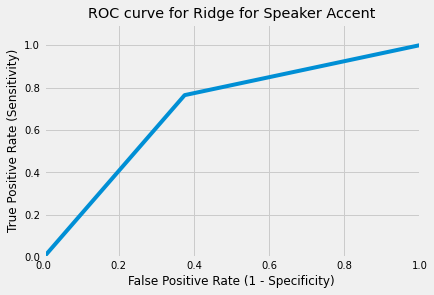

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr_ridge)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for Ridge for Speaker Accent')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("AUC of ROC for Ridge Regression is: ", metrics.roc_auc_score(y_test,y_pred_lr_ridge))

### KNN Performance Matrix

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(classification_report(y_test, y_pred_knn, target_names=['notUS Accent', 'isUS Accent']))

              precision    recall  f1-score   support

notUS Accent       0.78      0.88      0.82        16
 isUS Accent       0.87      0.76      0.81        17

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33



In [73]:
cm=metrics.confusion_matrix(y_test,y_pred_knn)
cm_df=pd.DataFrame(cm, columns= ['Predicted Negative','Predicted Positive'],
                   index=['Actual Negative','Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,14,2
Actual Positive,4,13


AUC of ROC for KNN is:  0.8198529411764706


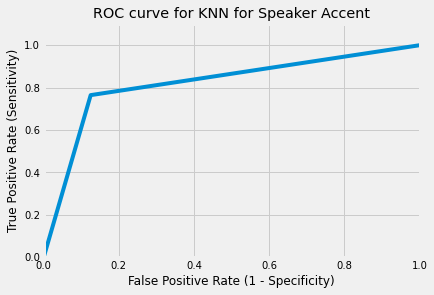

In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for KNN for Speaker Accent')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("AUC of ROC for KNN is: ", metrics.roc_auc_score(y_test,y_pred_knn))

### Decision Tree Performance Matrix

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(classification_report(y_test, y_pred_dt, target_names=['notUS Accent', 'isUS Accent']))

              precision    recall  f1-score   support

notUS Accent       0.82      0.88      0.85        16
 isUS Accent       0.88      0.82      0.85        17

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



In [76]:
cm=metrics.confusion_matrix(y_test,y_pred_dt)
cm_df=pd.DataFrame(cm, columns= ['Predicted Negative','Predicted Positive'],
                   index=['Actual Negative','Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,14,2
Actual Positive,3,14


AUC of ROC for Decision Tree is:  0.8492647058823529


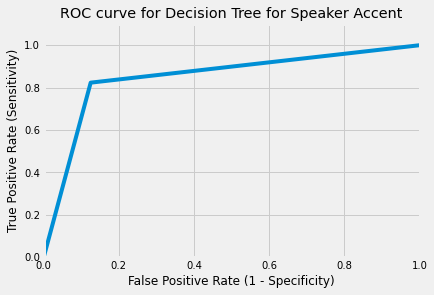

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for Decision Tree for Speaker Accent')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("AUC of ROC for Decision Tree is: ", metrics.roc_auc_score(y_test,y_pred_dt))

### Random Forest Performance Matrix

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(classification_report(y_test, y_pred_rf, target_names=['notUS Accent', 'isUS Accent']))

              precision    recall  f1-score   support

notUS Accent       1.00      0.88      0.93        16
 isUS Accent       0.89      1.00      0.94        17

    accuracy                           0.94        33
   macro avg       0.95      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33



In [79]:
cm=metrics.confusion_matrix(y_test,y_pred_rf)
cm_df=pd.DataFrame(cm, columns= ['Predicted Negative','Predicted Positive'],
                   index=['Actual Negative','Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,14,2
Actual Positive,0,17


AUC of ROC for Random Forest is:  0.9375


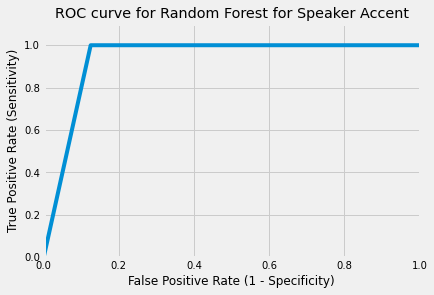

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for Random Forest for Speaker Accent')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("AUC of ROC for Random Forest is: ", metrics.roc_auc_score(y_test,y_pred_rf))
plt.grid(True)

In [81]:
print("Accuracy for Lasso Regresison Model: ", accuracy_score(y_test, y_pred_lr_lasso))
print("Accuracy for Ridge Regresison Model: ", accuracy_score(y_test, y_pred_lr_ridge))
print("Accuracy for KNN Model: ", accuracy_score(y_test, y_pred_knn))
print("Accuracy for Decision Tree Model: ", accuracy_score(y_test, y_pred_dt))
print("Accuracy for Random Forest Model: ", accuracy_score(y_test, y_pred_rf))

Accuracy for Lasso Regresison Model:  0.8484848484848485
Accuracy for Ridge Regresison Model:  0.696969696969697
Accuracy for KNN Model:  0.8181818181818182
Accuracy for Decision Tree Model:  0.8484848484848485
Accuracy for Random Forest Model:  0.9393939393939394


### Overall Result

    

Overall result is briefly explained in report.